Exploring tutorial: <br>
Looking for another regression "better" than OLS <br>
Will be exploring Lasso regression in this assignment to determine if it works better in predicting missing data than using OLS <br>

Recap on previous assignment discussion <br>
<font color='blue'>
From the figures above where predicted and actual values were plotted: <br>
1) S11-DRP - worked well <br>
2) S11-TP - worked okay (within somewhat expected range, but the model had weak R2 and p-value) <br>
3) S11-TSS - worked okay (within somewhat expected range) <br>
4) S12- DRP - worked well <br>
5) S12 - TP - worked well <br>
6) S12 - TSS - did not work at all (some of the predicted TSS concentrations were negative) <br>

In summary, this OLS model worked well for DRP and TP, but not TSS. Another suitable model is needed to predict TSS concentration. A potential approach is to multiple-linear-regression to incorporate several parameters such as precipitation data (antecedent condition) and time of the year (seasonality - land cover density).
</font>

So...in this assignment we will be exploring Lasso regression to determine if it works better in predicting missing data (especially TSS) than using OLS <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [2]:
# import data from excel
data = pd.read_excel('JY_linear_reg_data.xlsx', sheet_name = 'Data')

# drop 'VSS' column, rename the columns into shorter names
data = data.drop(columns=['VSS (mg/L)'])
data = data.rename(columns={'Sample date': 'Date', 'Flow (cms)':'Flow', 'DRP (mg P/L)':'DRP', 'TP (mg P/L)':'TP', 'TSS (mg/L)':'TSS'})
data.head()

,Date,Site,Flow,DRP,TP,TSS
0,2015-05-19,S11,0.028210,0.018,0.0015,22.333667
1,2015-06-16,S11,0.189993,0.027,0.1770,1006.666667
2,2015-06-30,S11,1.296460,0.203,1.2590,1338.666667
3,2015-08-18,S11,0.131722,0.050,1.3280,2026.000000
4,2015-08-25,S11,0.120204,0.010,3.1180,1722.000000


In [3]:
# separate data by site
data_11 = data[data['Site'] == 'S11']
data_12 = data[data['Site'] == 'S12']

# check the number of null values
print('S11')
print(data_11.isnull().sum())
print('S12')
print(data_12.isnull().sum())

S11
Date    0
Site    0
Flow    0
DRP     3
TP      3
TSS     3
dtype: int64
S12
Date    0
Site    0
Flow    0
DRP     4
TP      4
TSS     4
dtype: int64


In [4]:
# create separate dataframe that only contain null values
data_11_null = data_11[data_11.isnull().any(axis=1)]
data_12_null = data_12[data_12.isnull().any(axis=1)]
print('S11')
print(data_11_null)
print('S12')
print(data_12_null)

S11
         Date Site      Flow  DRP  TP  TSS
21 2018-06-22  S11  0.103414  NaN NaN  NaN
22 2018-06-27  S11  0.189099  NaN NaN  NaN
28 2018-10-11  S11  0.156634  NaN NaN  NaN
S12
         Date Site      Flow  DRP  TP  TSS
59 2018-08-21  S12  0.128687  NaN NaN  NaN
60 2018-08-31  S12  0.028923  NaN NaN  NaN
61 2018-09-06  S12  0.024730  NaN NaN  NaN
62 2018-09-26  S12  0.022594  NaN NaN  NaN


In [5]:
# drop the null values from the original dataset
data_11 = data_11.dropna()
data_12 = data_12.dropna()
print('S11')
print(data_11.isnull().sum())
print('S12')
print(data_12.isnull().sum())

S11
Date    0
Site    0
Flow    0
DRP     0
TP      0
TSS     0
dtype: int64
S12
Date    0
Site    0
Flow    0
DRP     0
TP      0
TSS     0
dtype: int64


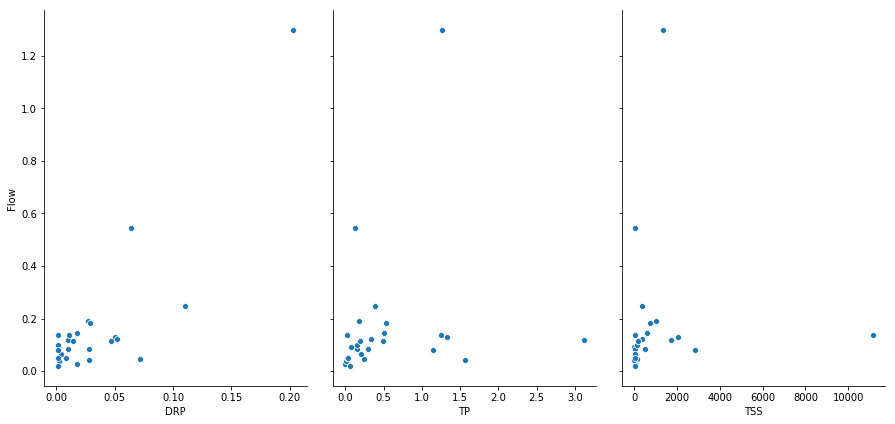

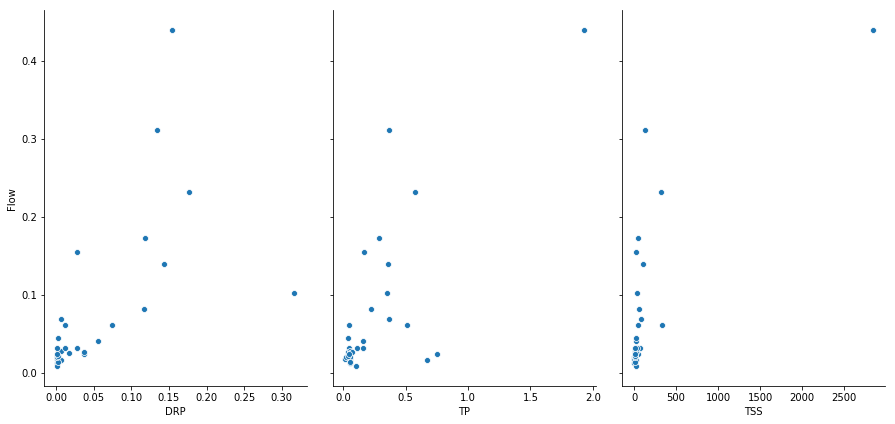

In [6]:
# visualize the relationship between flow and responses
sns.pairplot(data_11, x_vars=['DRP', 'TP', 'TSS'], y_vars=['Flow'], height=6, aspect=0.7)
sns.pairplot(data_12, x_vars=['DRP', 'TP', 'TSS'], y_vars=['Flow'], height=6, aspect=0.7)
plt.show()

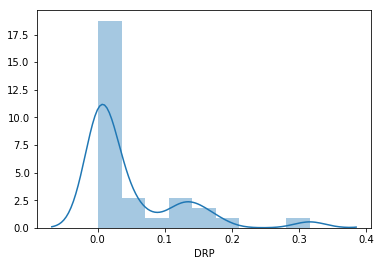

In [9]:
sns.distplot(data_12['DRP'])

In [11]:
# there are 6 datasets, try to use 1 dataset to get the model to work first, then incorporate the loop function later
x = data_12['Flow']
X = x[:, np.newaxis]
print(X.shape)

Y = data_12['DRP'] 
print(Y.shape)

(32, 1)
(32,)


In [12]:
# split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train.shape

(24, 1)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# small alpha value is needed 
reg = linear_model.Lasso(alpha=0.001)

# train the model
reg.fit(X_train, Y_train)

# predict outputs using test dataset
Y_pred = reg.predict(X_test)

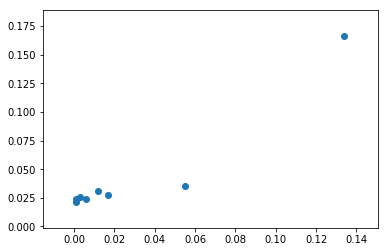

R2 = 0.7526864397540975


In [15]:
from sklearn.metrics import r2_score

# compare predict vs actual DRP
plt.scatter(Y_test, Y_pred)
plt.show()
print('R2 =',r2_score(Y_test, Y_pred))

R2 = 0.726 in this model is better than OLS prediction (R2 = 0.413) for S12 DRP. Now try this approach for other datasets

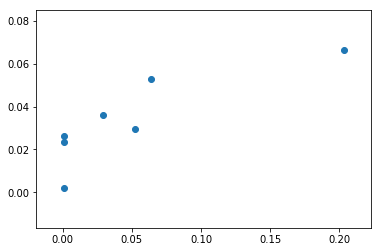

R2 = 0.34517755313344345


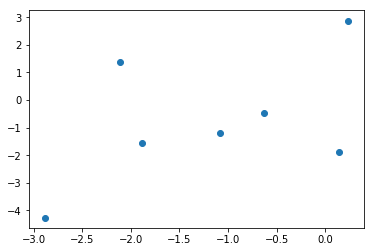

R2 = -2.0480522028689


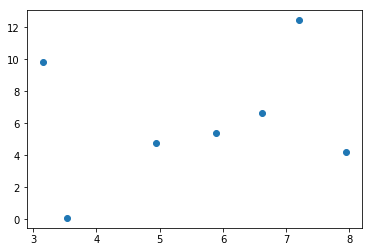

R2 = -3.929969396201855


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# use one loop for each site: sub 11 and sub 12
# work on sub 11 first
x = np.log(data_11['Flow'])
X = x[:, np.newaxis]

list_of_analytes = [data_11['DRP'], np.log(data_11['TP']), np.log(data_11['TSS'])]

for Y in list_of_analytes:
    #print(Y.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
    #print(X_train.shape)
    
    # small alpha value is needed 
    reg = linear_model.Lasso(alpha=0.0001)

    # train the model
    reg.fit(X_train, Y_train)

    # predict outputs using test dataset
    Y_pred = reg.predict(X_test)
    
    # compare predict vs actual values
    plt.scatter(Y_test, Y_pred)
    plt.show()
    print('R2 =',r2_score(Y_test, Y_pred))


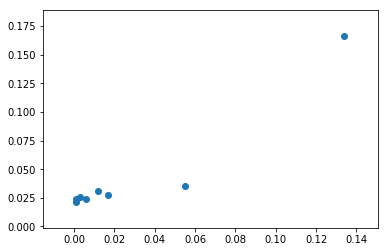

R2 = 0.7526864397540975


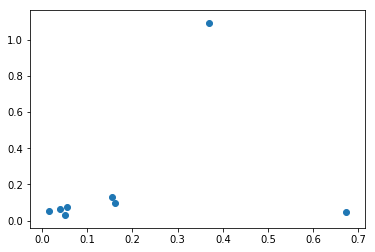

R2 = -1.588469289572016


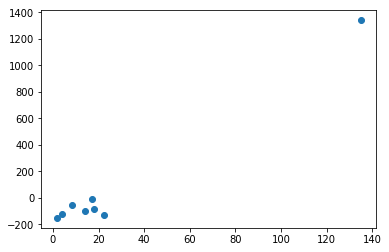

R2 = -112.9822019757838


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# use one loop for each site: sub 11 and sub 12
# work on sub 11 first
x = data_12['Flow']
X = x[:, np.newaxis]

list_of_analytes = [data_12['DRP'], data_12['TP'], data_12['TSS']]

for Y in list_of_analytes:
    #print(Y.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
    #print(X_train.shape)
     
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # small alpha value is needed 
    reg = linear_model.Lasso(alpha=0.001)

    # train the model
    reg.fit(X_train, Y_train)

    # predict outputs using test dataset
    Y_pred = reg.predict(X_test)
    
    # compare predict vs actual values
    plt.scatter(Y_test, Y_pred)
    plt.show()
    print('R2 =',r2_score(Y_test, Y_pred))

# Discussion:
Well...it turns out that this model only can predict DRP well (based on improved R2 of predicted vs actual values), and not TP or TSS. Standard scalar only approved S12-DRP prediction, but made S11-DRP prediction worse. <br>
This could be because surface runoff (i.e. TP and TSS) was not only affected by flow, but also affected by several other factors such as antecedent moisture condition, land cover, and crop type.